<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Least Squares optimization for parameter estimation
</h1>

Christian Bauckhage: "NumPy / SciPy Recipes for Data Science:
Ordinary Least Squares Optimization", Technical Report, March 2015 
([Download from ReseachGate](https://www.researchgate.net/publication/273133972_NumPy_SciPy_Recipes_for_Data_Science_Ordinary_Least_Squares_Optimization))

In [1]:
%run "lsqPlot.ipynb"

In [2]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Example data

In [4]:
def create_data(n, xmin=-2, xmax=12, a=1.1, b=2.0):
    x = rnd.random(n) * (xmax - xmin) + xmin
    y = a * x + b + rnd.randn(n) * 0.5
    return x, y

In [5]:
x, y = create_data(25)

In [6]:
for xi, yi in zip(x, y):
    print('({:.2f}, {:.2f})'.format(xi, yi), end=', ')

(-0.48, 1.60), (6.20, 9.58), (6.66, 9.45), (9.54, 12.35), (5.34, 7.83), (0.15, 1.49), (8.23, 11.21), (2.25, 4.34), (-0.83, 1.25), (0.27, 2.05), (0.18, 2.15), (-0.10, 1.05), (11.46, 14.59), (7.28, 10.60), (9.83, 12.49), (4.80, 7.87), (-0.00, 1.57), (8.92, 11.58), (10.31, 12.33), (7.85, 10.50), (0.02, 1.80), (8.19, 11.06), (5.66, 9.30), (2.05, 4.47), (10.42, 14.15), 

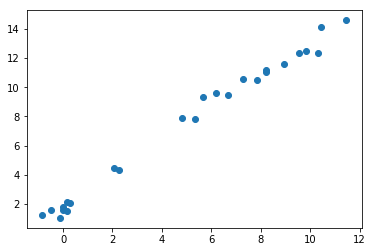

In [7]:
plt.scatter(x, y)
plt.show()

### Ordinary Least Squares

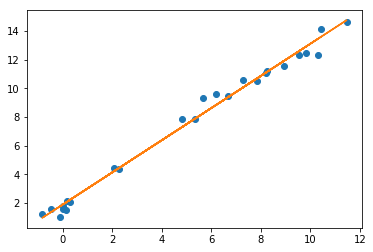

In [8]:
X = np.vander(x, 2)
w = la.lstsq(X, y)[0]
yhat = X.dot(w)

plt.plot(x, y, 'o')
plt.plot(x, yhat, '-')
plt.show()

## Comparison of Implementation Variants

### Computing a data matrix for linear regression

In [9]:
def data_matrix_V1(x):
    n = len(x)
    return np.vstack((x, np.ones(n))).T

def data_matrix_V2(x):
    return np.vstack((x, np.ones_like(x))).T
    
def data_matrix_V3(x):
    return np.vander(x, 2)

In [10]:
x = [4.7, 1.1]

X1 = data_matrix_V1(x)
X2 = data_matrix_V2(x)
X3 = data_matrix_V3(x)

#### All three variants create the same matrix

In [11]:
print(X1); print()
print(X2); print()
print(X3)

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]


### Solving Least Squares for Linear Regression

In [12]:
def lsq_solution_V1(X, y):
    w = la.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

def lsq_solution_V2(X, y):
    w = np.dot(la.pinv(X), y)
    return w

def lsq_solution_V3(X, y):
    w, residual, rank, svalues = la.lstsq(X, y)
    return w

#### All three variants create the same regression line

Version 1, w = [1.11041569 1.92858355]


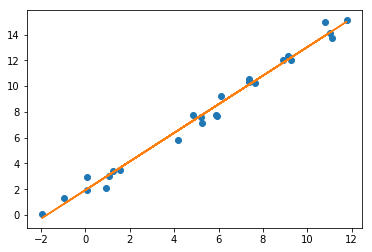


Version 2, w= [1.11041569 1.92858355]


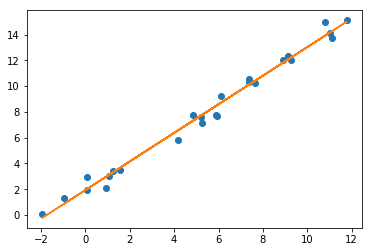


Version 3, w= [1.11041569 1.92858355]


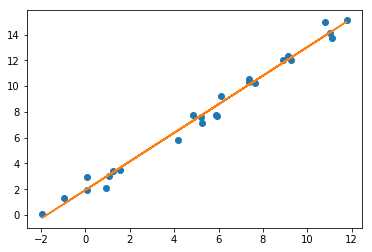

In [13]:
n = 25
x, y = create_data(n)

X = np.vander(x, 2)
w1 = lsq_solution_V1(X, y)
yhat1 = X.dot(w1)

w2 = lsq_solution_V2(X, y)
yhat2 = X.dot(w2)

w3 = lsq_solution_V3(X, y)
yhat3 = X.dot(w3)

print('Version 1, w =', w1)
plt.plot(x, y, 'o')
plt.plot(x, yhat1, '-')
plt.show()
print()

print('Version 2, w=', w2)
plt.plot(x, y, 'o')
plt.plot(x, yhat2, '-')
plt.show()
print()

print('Version 3, w=', w3)
plt.plot(x, y, 'o')
plt.plot(x, yhat3, '-')
plt.show()

### Performance comparison

In [14]:
import timeit

print(9*' '+'n', end='')
for v in [1, 2, 3]:
    print(8*' ' + 'V{}'.format(v), end='')
print()

for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
    print('{:10}'.format(n), end='')
    for v in [1, 2, 3]:
        t = timeit.timeit(
            stmt    = 'lsq_solution_V{}(X, y)'.format(v), 
            setup   = 'x, y = create_data(n); X = np.vander(x, 2)', 
            number  = 100, 
            globals = globals()
        )
        print('{:10.3f}'.format(t), end='')
    print()

         n        V1        V2        V3
       100     0.005     0.014     0.009
      1000     0.004     0.015     0.008
     10000     0.013     0.036     0.015
    100000     0.047     0.136     0.061
   1000000     0.571     1.507     0.751


## Recreating the nice plots of the paper

In [15]:
def dataXYBoundingBox(X, extension=0.1):
    xmin = X[0, :].min(); xmax = X[0,:].max(); dx = xmax - xmin
    ymin = X[1, :].min(); ymax = X[1,:].max(); dy = ymax - ymin
    
    return [xmin - extension * dx, xmax + extension * dx,
            ymin - extension * dy, ymax + extension * dy]

In [16]:
x, y = create_data(25)
X = np.vstack((x,y)) 

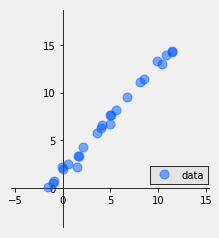

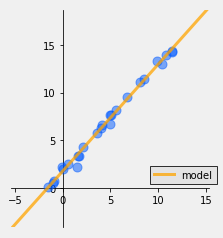

w =  [1.11872329 1.7863892 ]


In [17]:
limits = dataXYBoundingBox(X, extension=0.3)

C = np.vander(x, 2)
w = la.lstsq(C, y)[0]

umin = np.floor(limits[0])
umax = np.ceil (limits[1])
u = np.array([umin,umax])
v = np.dot(np.vander(u, 2), w)
M = np.vstack((u,v))


plotXYData(X, xlab='data', cart=True, lims=limits, legloc=[0.7,0.2])
plotXYData(X, MS=[M], mlabs=['model'], cart=True, lims=limits, legloc=[0.7,0.2])
print ('w = ', w)

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>